In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '/Users/tedmo/Documents/kaggle/ASHRAE/train.csv'
data_train = pd.DataFrame(pd.read_csv(data_path))

In [3]:
data_train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [4]:
print(data_train['timestamp'].min())
print(data_train['timestamp'].max())

2016-01-01 00:00:00
2016-12-31 23:00:00


In [5]:
strt_time = data_train['timestamp'].min()
strt_time

'2016-01-01 00:00:00'

In [6]:
# Identify the hours that are missing for each building and create a dictionary of missing hours by building
# This code takes a long tiem to run as it loops over the whole training set
# I will post the resulting dcitionary on the slack channel so that others do not have to run the code

year_by_hr = []
missing_hrs = {}

new_time = dt.datetime.strptime(strt_time, '%Y-%m-%d %H:%M:%S')
year_by_hr.append(new_time)

for n in range(24*366):
    new_time = dt.datetime.strptime(strt_time, '%Y-%m-%d %H:%M:%S') + n*dt.timedelta(hours=1)
    year_by_hr.append(new_time)
    
for bldg in data_train['building_id'].unique():
    hrs_in_build = []
    for t in data_train['timestamp'][data_train['building_id']==bldg].unique():
        new_time = dt.datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
        hrs_in_build.append(new_time)
    missing_hrs[bldg] = set(list(hrs_in_build)) ^ set(list(year_by_hr))

In [7]:
missing_hrs

{0: set(),
 1: set(),
 2: set(),
 3: set(),
 4: set(),
 5: set(),
 6: set(),
 7: set(),
 8: set(),
 9: set(),
 10: set(),
 11: set(),
 12: set(),
 13: set(),
 14: set(),
 15: set(),
 16: set(),
 17: set(),
 18: set(),
 19: set(),
 20: set(),
 21: set(),
 22: set(),
 23: set(),
 24: set(),
 25: set(),
 26: set(),
 27: set(),
 28: set(),
 30: set(),
 31: set(),
 32: set(),
 33: set(),
 34: set(),
 35: set(),
 36: set(),
 37: set(),
 38: set(),
 39: set(),
 40: {datetime.datetime(2016, 5, 1, 19, 0),
  datetime.datetime(2016, 5, 19, 1, 0),
  datetime.datetime(2016, 5, 19, 2, 0),
  datetime.datetime(2016, 5, 19, 3, 0),
  datetime.datetime(2016, 5, 19, 4, 0),
  datetime.datetime(2016, 5, 19, 5, 0),
  datetime.datetime(2016, 5, 19, 6, 0),
  datetime.datetime(2016, 5, 19, 7, 0),
  datetime.datetime(2016, 5, 19, 8, 0),
  datetime.datetime(2016, 5, 19, 9, 0),
  datetime.datetime(2016, 5, 19, 10, 0),
  datetime.datetime(2016, 5, 19, 11, 0),
  datetime.datetime(2016, 5, 19, 12, 0),
  datetime.date

In [11]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_missing_hrs_dict.pickle', 'wb') as handle:
    pickle.dump(missing_hrs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_missing_hrs_dict.pickle', 'rb') as handle:
     missing_hrs = pickle.load(handle)

In [22]:
# this code just converts the dictionary into a list of tuples containing building_id and number of missing hours

zero_hrs = []
bldg_miss_hrs = []
for k in missing_hrs.keys():
    if len(missing_hrs[k]) > 0:
        print(k, len(missing_hrs[k]))
        bldg_miss_hrs.append((k, len(missing_hrs[k])))
    else:
        zero_hrs.append(k)
        

40 356
45 1
47 1
53 7099
101 1
103 66
152 2
156 1
157 1
158 1
159 11
160 174
161 1
162 1
163 1
164 47
165 40
166 1
167 1
168 1
169 1
170 1
172 1
173 3
174 3
175 1
176 1
177 3
178 3
179 3
180 3
181 3
182 381
183 3
184 1
185 10
186 3
187 3
188 3
189 3
190 3
191 3
192 3
193 3
194 3
195 3
196 3
197 3
198 3
199 3
200 3
201 3
202 3
203 3
204 3
205 3
206 2
207 3
208 1
209 3
210 3
211 3
212 3
213 3
214 3
215 3
216 1
217 2
218 2
219 2
221 2
222 2
223 2
224 2
225 2
226 2
227 2
228 2
229 2
230 2
231 2
232 2
233 1
234 2
235 2
236 2
237 2
238 2
239 2
240 2
241 2
242 2
243 2
244 2
245 2
246 2
247 2
248 2
249 2
250 2
251 39
252 1
253 2
254 1
255 1
256 3
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
267 1
268 1
269 1
270 20
271 1
273 1
274 1
275 1
276 1
277 1
278 1
279 1
280 3
281 1
282 1
283 1
284 1
285 1
286 1
287 1
288 1
289 1
290 1
291 26
292 92
293 2
294 2
295 2
296 346
297 26
298 202
301 2
302 2
303 2
304 2
305 4
306 26
307 2
308 2
309 2
310 2
311 26
312 2
313 2
314 26
315 2
316 2


In [12]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_missing_hrs_lst.pickle', 'wb') as handle:
    pickle.dump(bldg_miss_hrs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_missing_hrs_lst.pickle', 'rb') as handle:
     bldg_miss_hrs = pickle.load(handle)

In [23]:
bld_miss_hrs_sort_lst = sorted(bldg_miss_hrs, key=lambda tup: tup[1])
bld_miss_hrs_sort_lst

[(45, 1),
 (47, 1),
 (101, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (161, 1),
 (162, 1),
 (163, 1),
 (166, 1),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 1),
 (172, 1),
 (175, 1),
 (176, 1),
 (184, 1),
 (208, 1),
 (216, 1),
 (233, 1),
 (252, 1),
 (254, 1),
 (255, 1),
 (257, 1),
 (258, 1),
 (259, 1),
 (260, 1),
 (261, 1),
 (262, 1),
 (263, 1),
 (264, 1),
 (265, 1),
 (266, 1),
 (267, 1),
 (268, 1),
 (269, 1),
 (271, 1),
 (273, 1),
 (274, 1),
 (275, 1),
 (276, 1),
 (277, 1),
 (278, 1),
 (279, 1),
 (281, 1),
 (282, 1),
 (283, 1),
 (284, 1),
 (285, 1),
 (286, 1),
 (287, 1),
 (288, 1),
 (289, 1),
 (290, 1),
 (569, 1),
 (570, 1),
 (571, 1),
 (573, 1),
 (574, 1),
 (576, 1),
 (577, 1),
 (578, 1),
 (580, 1),
 (584, 1),
 (586, 1),
 (588, 1),
 (589, 1),
 (594, 1),
 (595, 1),
 (597, 1),
 (598, 1),
 (599, 1),
 (603, 1),
 (605, 1),
 (608, 1),
 (610, 1),
 (614, 1),
 (616, 1),
 (617, 1),
 (618, 1),
 (620, 1),
 (622, 1),
 (623, 1),
 (624, 1),
 (628, 1),
 (629, 1),
 (631, 1),
 (634, 1),
 (638, 1),
 (639, 1),
 

In [24]:
# create training set containing only those buildings with 30 hours or less missing
all_hrs_training_lst = zero_hrs[0:]

for b,h in bldg_miss_hrs:
    if h<=30:
        all_hrs_training_lst.append(b)

In [72]:
len(all_hrs_training_lst)

1151

In [73]:
len(zero_hrs)

501

In [77]:
all_hrs_training_lst[0:50]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 49,
 50,
 51,
 52,
 54,
 55]

In [14]:
366*24

8784

In [28]:
len(data_train[data_train['building_id']==53])

1685

In [29]:
7099+1685

8784

In [30]:
len(data_train[data_train['building_id']==403])

479

In [31]:
8305+479

8784

In [29]:
train_bldg_meters = data_train.groupby(['building_id', 'meter']).size()
train_bldg_meters

building_id  meter
0            0        8784
1            0        8784
2            0        8784
3            0        8784
4            0        8784
5            0        8784
6            0        8784
7            0        8784
             1        7267
8            0        8784
9            0        8784
             1        7265
10           0        8784
11           0        8784
12           0        8784
13           0        8784
             1        6940
14           0        8784
             1        7269
15           0        8784
             1        7269
16           0        8784
17           0        8784
18           0        8784
19           0        8784
20           0        8784
21           0        8784
22           0        8784
23           0        8784
24           0        8784
                      ... 
1427         2        7472
1428         0        7380
1429         0        7456
1430         0        5348
             2        7472
1431     

In [44]:
test=train_bldg_meters[7]

In [52]:
# create a dictionary of the number of meters in each building

bldg_mtr_cnt_dict = {}

for b in data_train['building_id'].unique():
    bldg_mtr_cnt_dict[b] = len(train_bldg_meters[b])

In [51]:
len(train_bldg_meters)

2380

In [53]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_mtrs_lst.pickle', 'wb') as handle:
    pickle.dump(train_bldg_meters, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_mtrs_cnt_dict.pickle', 'wb') as handle:
    pickle.dump(bldg_mtr_cnt_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_mtrs_lst.pickle', 'rb') as handle:
     train_bldg_meters = pickle.load(handle)
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_building_mtrs_cnt_dict.pickle', 'rb') as handle:
     bldg_mtr_cnt_dict = pickle.load(handle)

In [26]:
def meter_sums(build, temp_df):
    blg_lst = []
    time_lst = []
    reading_ttl_lst = []
    for hrs in temp_df['timestamp'].unique():
        temp_time_df = temp_df[temp_df['timestamp']==hrs]
        reading_ttl_lst.append(temp_time_df['meter_reading'].sum())
        blg_lst.append(build)
        time_lst.append(hrs)
    re_build_df = pd.DataFrame(blg_lst, columns=['building_id'])
    re_build_df['timestamp'] = time_lst
    re_build_df['meter_totals'] = reading_ttl_lst
    
    return re_build_df


In [27]:
cnt = 0

for b in all_hrs_training_lst:
    if cnt == 0:
        df_train_all_hrs = meter_sums(b, data_train[data_train['building_id']==b])
        #df_train_all_hrs = pd.DataFrame(data_train[data_train['building_id']==b])
        cnt += 1
    else:
        temp_df = meter_sums(b, data_train[data_train['building_id']==b])
        #temp_df = pd.DataFrame(data_train[data_train['building_id']==b])
        df_train_all_hrs = pd.concat([df_train_all_hrs,temp_df])
    


In [28]:
df_train_all_hrs.head()

,building_id,timestamp,meter_totals
0,0,2016-01-01 00:00:00,0.0
1,0,2016-01-01 01:00:00,0.0
2,0,2016-01-01 02:00:00,0.0
3,0,2016-01-01 03:00:00,0.0
4,0,2016-01-01 04:00:00,0.0


In [29]:
df_train_all_hrs.shape

(10105984, 3)

In [30]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_data_all_hrs_df.pickle', 'wb') as handle:
    pickle.dump(df_train_all_hrs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_data_all_hrs_df.pickle', 'rb') as handle:
     df_train_all_hrs = pickle.load(handle)

In [58]:
strt_time = df_train_all_hrs['timestamp'].min()
cnt = 0

for building in df_train_all_hrs['building_id'].unique():
    year_by_hr = []
    bldg_lst = []
    mtr_cnt_lst = []
    mtr_cnt = bldg_mtr_cnt_dict[building]
    for n in range(24*366):
        new_time = dt.datetime.strptime(strt_time, '%Y-%m-%d %H:%M:%S') + n*dt.timedelta(hours=1)
        time_str = str(new_time.isoformat())
        time_str = time_str.replace('T',' ')
        year_by_hr.append(time_str)
        bldg_lst.append(building)
        mtr_cnt_lst.append(mtr_cnt)
    if cnt == 0:
        build_hrs_df = pd.DataFrame(bldg_lst, columns=['building_id'])
        build_hrs_df['timestamp'] = year_by_hr
        build_hrs_df['meter_count'] = mtr_cnt_lst
        cnt += 1
    else:
        temp_df = pd.DataFrame(bldg_lst, columns=['building_id'])
        temp_df['timestamp'] = year_by_hr
        temp_df['meter_count'] = mtr_cnt_lst
        build_hrs_df = pd.concat([build_hrs_df,temp_df])
    

In [59]:
len(build_hrs_df)

10110384

In [60]:
df_train_all_hrs = df_train_all_hrs.merge(build_hrs_df, on=['building_id','timestamp'], how='outer')

In [71]:
df_train_all_hrs = df_train_all_hrs.sort_values(['building_id','timestamp'])

In [72]:
df_train_all_hrs.shape

(10110384, 4)

In [73]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_data_all_hrs_filled_df.pickle', 'wb') as handle:
    pickle.dump(df_train_all_hrs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_data_all_hrs_filled_df.pickle', 'rb') as handle:
     df_train_all_hrs = pickle.load(handle)

In [74]:
sum(df_train_all_hrs['meter_totals'].isna())

4400

In [65]:
10105984-10110384

-4400

In [78]:
df_train_all_hrs['meter_totals'].fillna(method ='ffill', inplace=True)

In [68]:
len(df_train_all_hrs[df_train_all_hrs['meter_totals']==0])

408274

In [80]:
df_train_all_hrs.tail()

,building_id,timestamp,meter_totals,meter_count
4400779,1324,2016-12-31 19:00:00,43.1301,3
4400780,1324,2016-12-31 20:00:00,154.7020,3
4400781,1324,2016-12-31 21:00:00,142.6750,3
4400782,1324,2016-12-31 22:00:00,132.2510,3
4400783,1324,2016-12-31 23:00:00,378.0190,3


In [77]:
408274/10000000

0.0408274

In [79]:
data_path = '/Users/tedmo/Documents/kaggle/ASHRAE/building_metadata.csv'
data_building = pd.DataFrame(pd.read_csv(data_path))

In [81]:
df_train_all_hrs = df_train_all_hrs.merge(data_building, on=['building_id'], how='inner')

In [82]:
df_train_all_hrs.shape

(10110384, 9)

In [83]:
df_train_all_hrs.tail()

,building_id,timestamp,meter_totals,meter_count,site_id,primary_use,square_feet,year_built,floor_count
10110379,1324,2016-12-31 19:00:00,43.1301,3,14,Entertainment/public assembly,84688,NaN,NaN
10110380,1324,2016-12-31 20:00:00,154.7020,3,14,Entertainment/public assembly,84688,NaN,NaN
10110381,1324,2016-12-31 21:00:00,142.6750,3,14,Entertainment/public assembly,84688,NaN,NaN
10110382,1324,2016-12-31 22:00:00,132.2510,3,14,Entertainment/public assembly,84688,NaN,NaN
10110383,1324,2016-12-31 23:00:00,378.0190,3,14,Entertainment/public assembly,84688,NaN,NaN


In [86]:
sum(df_train_all_hrs['square_feet']==0)

0

In [87]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_1151_bld_and_hrs_df.pickle', 'wb') as handle:
    pickle.dump(df_train_all_hrs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
with open('/Users/tedmo/Documents/kaggle/ASHRAE/train_1151_bld_and_hrs_df.pickle', 'rb') as handle:
     df_train_all_hrs = pickle.load(handle)

In [3]:
df_train_all_hrs['mtr_ttl_per_sqf'] = df_train_all_hrs['meter_totals'] / df_train_all_hrs['square_feet']

In [110]:
train_mean_by_use = df_train_all_hrs.groupby(['primary_use']).mean()
train_mean_by_use

,building_id,meter_totals,meter_count,site_id,square_feet,year_built,floor_count,mtr_ttl_per_sqf
primary_use,,,,,,,,
Education,626.873085,9210.773779,1.768053,5.693654,107198.919037,1962.929688,4.806667,0.031515
Entertainment/public assembly,618.944882,864.658346,1.543307,5.488189,88529.779528,1974.740000,3.000000,0.007767
Food sales and service,815.400000,792.063278,2.600000,9.000000,38485.000000,2012.000000,NaN,0.018184
Healthcare,970.318182,1520.492442,2.045455,9.863636,144799.772727,1981.142857,1.000000,0.012016
Lodging/residential,557.176991,545.314611,1.761062,5.203540,88173.787611,1981.272727,6.411765,0.004593
Manufacturing/industrial,993.333333,295.641280,1.222222,10.333333,40301.222222,1957.000000,1.666667,0.007641
Office,789.179167,1054.448702,1.866667,8.225000,87664.941667,1977.090909,4.655172,0.007758
Other,632.357143,258.762059,1.285714,5.928571,30954.357143,1980.000000,1.000000,0.033647
Parking,517.450000,203.725724,1.150000,5.200000,291949.600000,2001.416667,2.000000,0.001129


In [96]:
train_describe_by_use = df_train_all_hrs.groupby(['primary_use'])['mtr_ttl_per_sqf'].describe()
train_describe_by_use

,count,mean,std,min,25%,50%,75%,max
primary_use,,,,,,,,
Education,4014288.0,0.031515,1.032427,0.000000,0.000725,0.002018,0.005622,65.805118
Entertainment/public assembly,1115568.0,0.007767,0.136188,0.000000,0.000821,0.002111,0.004544,8.128079
Food sales and service,43920.0,0.018184,0.021637,0.000000,0.005593,0.009479,0.025449,0.240375
Healthcare,193248.0,0.012016,0.014010,0.000000,0.001958,0.004322,0.020006,0.092556
Lodging/residential,992592.0,0.004593,0.007737,0.000000,0.000770,0.002146,0.005442,0.175876
Manufacturing/industrial,79056.0,0.007641,0.009800,0.000000,0.001353,0.003111,0.010940,0.067913
Office,2108160.0,0.007758,0.013521,0.000000,0.000892,0.002509,0.008193,0.852742
Other,122976.0,0.033647,0.123807,0.000000,0.001116,0.002337,0.008968,2.157756
Parking,175680.0,0.001129,0.002649,0.000000,0.000107,0.000251,0.000665,0.031057


In [97]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(train_describe_by_use)

In [100]:
kmeans.labels_

array([1, 5, 2, 4, 0, 2, 3, 4, 4, 0, 2, 2, 2, 2, 2, 2])

In [101]:
train_describe_by_use['cluster'] = kmeans.labels_

In [102]:
train_describe_by_use

,count,mean,std,min,25%,50%,75%,max,cluster
primary_use,,,,,,,,,
Education,4014288.0,0.031515,1.032427,0.000000,0.000725,0.002018,0.005622,65.805118,1
Entertainment/public assembly,1115568.0,0.007767,0.136188,0.000000,0.000821,0.002111,0.004544,8.128079,5
Food sales and service,43920.0,0.018184,0.021637,0.000000,0.005593,0.009479,0.025449,0.240375,2
Healthcare,193248.0,0.012016,0.014010,0.000000,0.001958,0.004322,0.020006,0.092556,4
Lodging/residential,992592.0,0.004593,0.007737,0.000000,0.000770,0.002146,0.005442,0.175876,0
Manufacturing/industrial,79056.0,0.007641,0.009800,0.000000,0.001353,0.003111,0.010940,0.067913,2
Office,2108160.0,0.007758,0.013521,0.000000,0.000892,0.002509,0.008193,0.852742,3
Other,122976.0,0.033647,0.123807,0.000000,0.001116,0.002337,0.008968,2.157756,4
Parking,175680.0,0.001129,0.002649,0.000000,0.000107,0.000251,0.000665,0.031057,4


In [111]:
train_mean_by_use = train_mean_by_use.drop(['building_id', 'year_built', 'floor_count'], axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(train_mean_by_use)

In [112]:
kmeans.labels_

array([2, 2, 1, 4, 2, 1, 2, 1, 3, 5, 1, 1, 0, 5, 1, 5])

In [113]:
train_describe_by_use['cluster_means'] = kmeans.labels_
train_describe_by_use

,count,mean,std,min,25%,50%,75%,max,cluster,cluster_means
primary_use,,,,,,,,,,
Education,4014288.0,0.031515,1.032427,0.000000,0.000725,0.002018,0.005622,65.805118,1,2
Entertainment/public assembly,1115568.0,0.007767,0.136188,0.000000,0.000821,0.002111,0.004544,8.128079,5,2
Food sales and service,43920.0,0.018184,0.021637,0.000000,0.005593,0.009479,0.025449,0.240375,2,1
Healthcare,193248.0,0.012016,0.014010,0.000000,0.001958,0.004322,0.020006,0.092556,4,4
Lodging/residential,992592.0,0.004593,0.007737,0.000000,0.000770,0.002146,0.005442,0.175876,0,2
Manufacturing/industrial,79056.0,0.007641,0.009800,0.000000,0.001353,0.003111,0.010940,0.067913,2,1
Office,2108160.0,0.007758,0.013521,0.000000,0.000892,0.002509,0.008193,0.852742,3,2
Other,122976.0,0.033647,0.123807,0.000000,0.001116,0.002337,0.008968,2.157756,4,1
Parking,175680.0,0.001129,0.002649,0.000000,0.000107,0.000251,0.000665,0.031057,4,3


In [115]:
train_describe_by_use.groupby(['cluster']).mean()

,count,mean,std,min,25%,50%,75%,max,cluster_means
cluster,,,,,,,,,
0,966240.0,0.004377,0.008093,0.000000,0.000886,0.001941,0.004242,0.163267,3.500000
1,4014288.0,0.031515,1.032427,0.000000,0.000725,0.002018,0.005622,65.805118,2.000000
2,55998.0,0.026215,0.049920,0.001537,0.007039,0.011352,0.020008,0.433949,1.875000
3,2108160.0,0.007758,0.013521,0.000000,0.000892,0.002509,0.008193,0.852742,2.000000
4,163968.0,0.015597,0.046822,0.000000,0.001060,0.002303,0.009880,0.760456,2.666667
5,1115568.0,0.007767,0.136188,0.000000,0.000821,0.002111,0.004544,8.128079,2.000000


In [118]:
train_describe_by_use.groupby(['cluster_means']).mean()

,count,mean,std,min,25%,50%,75%,max,cluster
cluster_means,,,,,,,,,
0,87840.0,0.089621,0.303529,0.000000,0.000264,0.000361,0.001008,2.559857,2.000000
1,61488.0,0.024790,0.035573,0.002049,0.009245,0.014979,0.026756,0.484229,2.333333
2,2057652.0,0.012908,0.297468,0.000000,0.000802,0.002196,0.005950,18.740454,2.250000
3,175680.0,0.001129,0.002649,0.000000,0.000107,0.000251,0.000665,0.031057,4.000000
4,193248.0,0.012016,0.014010,0.000000,0.001958,0.004322,0.020006,0.092556,4.000000
5,351360.0,0.003056,0.004885,0.000000,0.000898,0.001551,0.003510,0.104923,1.333333


In [119]:
cluster_means_df = train_describe_by_use.groupby(['cluster_means']).sum()
cluster_means_df['num_bldgs'] = cluster_means_df['count'] / 8784
cluster_means_df

,count,mean,std,min,25%,50%,75%,max,cluster,num_bldgs
cluster_means,,,,,,,,,,
0,87840.0,0.089621,0.303529,0.000000,0.000264,0.000361,0.001008,2.559857,2,10.0
1,368928.0,0.148741,0.213435,0.012296,0.055472,0.089875,0.160539,2.905375,14,42.0
2,8230608.0,0.051632,1.189873,0.000000,0.003208,0.008784,0.023801,74.961814,9,937.0
3,175680.0,0.001129,0.002649,0.000000,0.000107,0.000251,0.000665,0.031057,4,20.0
4,193248.0,0.012016,0.014010,0.000000,0.001958,0.004322,0.020006,0.092556,4,22.0
5,1054080.0,0.009168,0.014654,0.000000,0.002694,0.004653,0.010529,0.314770,4,120.0


In [120]:
cluster_means_df1 = train_describe_by_use.groupby(['cluster']).sum()
cluster_means_df1['num_bldgs'] = cluster_means_df1['count'] / 8784
cluster_means_df1

,count,mean,std,min,25%,50%,75%,max,cluster_means,num_bldgs
cluster,,,,,,,,,,
0,1932480.0,0.008755,0.016186,0.000000,0.001772,0.003882,0.008484,0.326533,7,220.0
1,4014288.0,0.031515,1.032427,0.000000,0.000725,0.002018,0.005622,65.805118,2,457.0
2,447984.0,0.209721,0.399362,0.012296,0.056313,0.090817,0.160065,3.471589,15,51.0
3,2108160.0,0.007758,0.013521,0.000000,0.000892,0.002509,0.008193,0.852742,2,240.0
4,491904.0,0.046792,0.140466,0.000000,0.003181,0.006909,0.029639,2.281368,8,56.0
5,1115568.0,0.007767,0.136188,0.000000,0.000821,0.002111,0.004544,8.128079,2,127.0


In [124]:
# building 1099 appears to be an outlier with readings in the e+07 range
# problem is not for the entire time frame of data since count of lines > 1 is less than 8784 (366*24) 
df_train_all_hrs.index[df_train_all_hrs['mtr_ttl_per_sqf']>65].tolist()

[8162061, 8164208, 8164209, 8164280, 8164281, 8167861, 8167862]

In [133]:
df_train_all_hrs.loc[8167862,]

building_id                       1099
timestamp          2016-11-09 14:00:00
meter_totals               2.18488e+07
meter_count                          2
site_id                             13
primary_use                  Education
square_feet                     332884
year_built                         NaN
floor_count                        NaN
mtr_ttl_per_sqf                65.6348
Name: 8167862, dtype: object

In [45]:
mtr_outliers = df_train_all_hrs.index[df_train_all_hrs['mtr_ttl_per_sqf']>1].tolist()
len(df_train_all_hrs.index[df_train_all_hrs['mtr_ttl_per_sqf']>1].tolist())

6572

In [149]:
df_train_all_hrs.loc[8160336,]

building_id                       1099
timestamp          2016-01-01 00:00:00
meter_totals               3.24191e+06
meter_count                          2
site_id                             13
primary_use                  Education
square_feet                     332884
year_built                         NaN
floor_count                        NaN
mtr_ttl_per_sqf                9.73886
Name: 8160336, dtype: object

In [154]:
df_train_all_hrs.loc[8169119,]

building_id                       1099
timestamp          2016-12-31 23:00:00
meter_totals                   5303.69
meter_count                          2
site_id                             13
primary_use                  Education
square_feet                     332884
year_built                         NaN
floor_count                        NaN
mtr_ttl_per_sqf              0.0159325
Name: 8169119, dtype: object

(array([5882.,  322.,  478.,  538.,  117.,   77.,  281.,  535.,  423.,
         131.]),
 array([1.99814650e-03, 6.58231013e+00, 1.31626221e+01, 1.97429341e+01,
        2.63232461e+01, 3.29035581e+01, 3.94838701e+01, 4.60641821e+01,
        5.26444940e+01, 5.92248060e+01, 6.58051180e+01]),
 <a list of 10 Patch objects>)

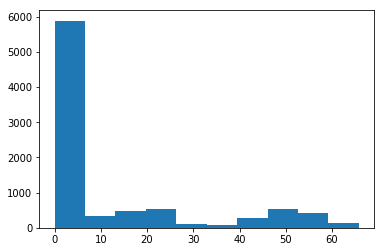

In [156]:
plt.hist(df_train_all_hrs['mtr_ttl_per_sqf'].loc[8160336:8169119,])

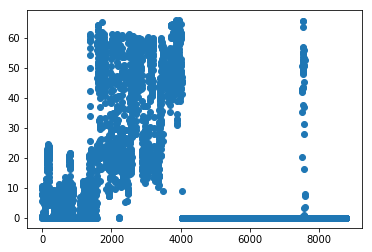

In [5]:
plt.scatter(range(8784), df_train_all_hrs['mtr_ttl_per_sqf'].loc[8160336:8169119,])

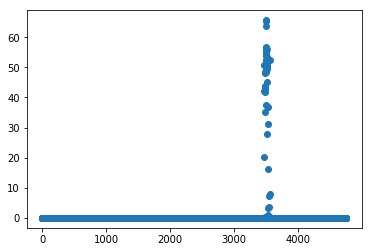

In [35]:
plt.scatter(range(8784-4031), df_train_all_hrs['mtr_ttl_per_sqf'].loc[8164367:8169119,])

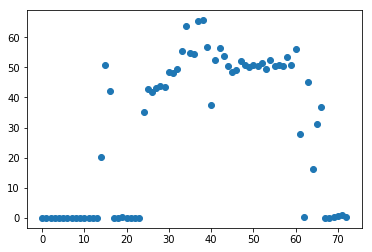

In [44]:
plt.scatter(range(73), df_train_all_hrs['mtr_ttl_per_sqf'].loc[8167848-24:8167848+48,])

In [39]:
df_train_all_hrs.loc[8160336+4031+3481,]

building_id                       1099
timestamp          2016-11-09 00:00:00
meter_totals               1.17052e+07
meter_count                          2
site_id                             13
primary_use                  Education
square_feet                     332884
year_built                         NaN
floor_count                        NaN
mtr_ttl_per_sqf                35.1629
Name: 8167848, dtype: object

In [51]:
df_train_all_hrs.loc[mtr_outliers,].groupby(['building_id']).size()

building_id
50         2
60         1
778      837
904        1
954        1
993        1
1015      26
1088     119
1099    3192
1197    2392
dtype: int64

In [52]:
df_train_all_hrs.groupby(['building_id']).mean()

,meter_totals,meter_count,site_id,square_feet,year_built,floor_count,mtr_ttl_per_sqf
building_id,,,,,,,
0,146.454978,1,0,7432,2008.0,NaN,0.019706
1,74.865393,1,0,2720,2004.0,NaN,0.027524
2,14.551385,1,0,5376,1991.0,NaN,0.002707
3,235.549966,1,0,23685,2002.0,NaN,0.009945
4,976.556746,1,0,116607,1975.0,NaN,0.008375
5,17.894445,1,0,8000,2000.0,NaN,0.002237
6,64.066607,1,0,27926,1981.0,NaN,0.002294
7,2912.517263,2,0,121074,1989.0,NaN,0.024056
8,256.927804,1,0,60809,2003.0,NaN,0.004225
